# Health Indicators - Diabetes 

**Context**

Diabetes is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. Diabetes is generally characterized by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed.


Data set can be found at this URL https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data-with-Ge/n8mc-b4w4/about_data


### Import Libraries

In [1]:
import requests
import pandas as pd
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Cuda GPU Accelerator Libraries
#!pip install pandas scikit-learn
# For GPU acceleration (if you have a compatible NVIDIA GPU and CUDA installed)
#!pip install cuml

In [2]:
# Set CUDA_VISIBLE_DEVICES to utilize all available GPUs
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # Replace "0" with the index of your GPU if you have multiple GPUs
print("Cuda device Visible.")

# Set CUDA_HOME environment variable
os.environ['CUDA_HOME'] = r'C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.4'  # Replace with your CUDA installation path

# Append CUDA bin directory to PATH
os.environ['PATH'] += ';' + os.path.join(os.environ['CUDA_HOME'], 'bin')
print("CUDA environment variables configured successfully.")

Cuda device Visible.
CUDA environment variables configured successfully.


In [3]:
#pip list

## Read CSV File

In [4]:
import pandas as pd
#file_path = r'C:\Users\casal\OneDrive\Desktop\Documents\1- Data Science Stuff\Projects\Health Indicators\diabetes_012_health_indicators_BRFSS2015.csv'


file_path = r'C:\Users\casal\OneDrive\Desktop\Documents\1- Data Science Stuff\Projects\Health Indicators\diabetes_012_health_indicators_BRFSS2015.csv'

# Read the CSV file in chunks if chunk_size is specified
raw_data = pd.read_csv(file_path, dtype={3: 'str'})  # For example, force column 3 to be read as string

## 1. Initial Data Inspection


In [5]:
#raw_data.info()

### 1.1 Correcting Data Types to Integer for Visualization

In [6]:
# We will convert all columns to integers except 'Age', 'Education', and 'Income'
#convert 'CholCheck' from string to float
raw_data['CholCheck'] = raw_data['CholCheck'].astype(float)

# Get a list of all column names
all_columns = raw_data.columns.tolist()

# Define the columns to exclude from conversion
columns_to_exclude = ['Age', 'Education', 'Income']

# List of columns to convert is all columns except the ones to exclude
columns_to_convert = [column for column in all_columns if column not in columns_to_exclude]

# Convert each column to integer, handling NaN values by replacing them with a default integer (e.g., -1)
for column in columns_to_convert:
    raw_data[column] = raw_data[column].fillna(-1).astype(int)

# Now the dataframe has all columns as integers except 'Age', 'Education', and 'Income'

In [7]:
raw_data.head(2)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9.0,4.0,3.0
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7.0,6.0,1.0


In [8]:
#Heat Map Code - Color palete mako or crest

## Bar charts for binary data

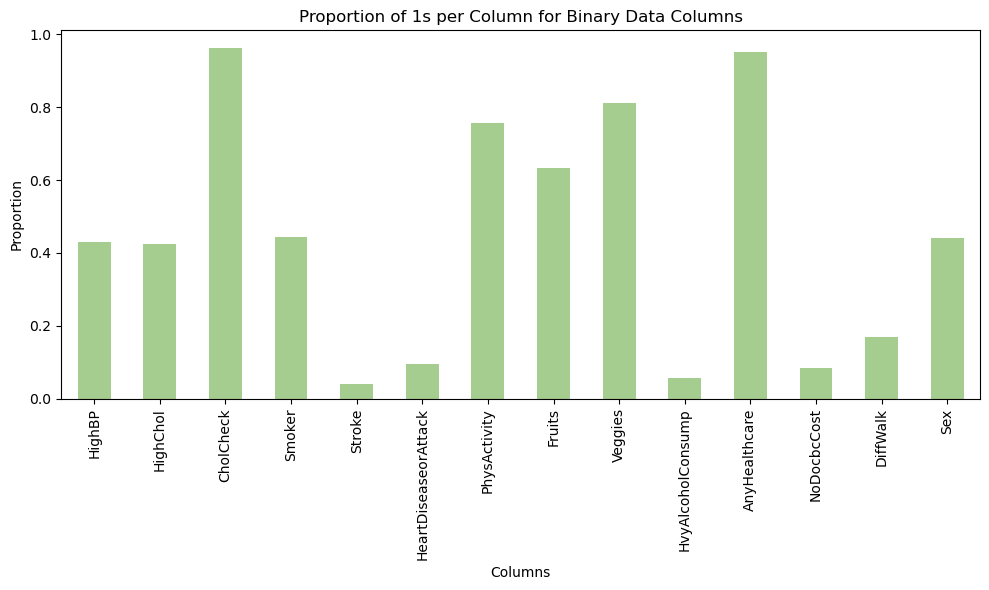

In [9]:
import gc

# Filter columns: include only those where all values are 0 or 1
filtered_columns = raw_data.columns[(raw_data <= 1).all()]
filtered_data = raw_data[filtered_columns]

# Calculate the proportion of 1s for each column efficiently in 'filtered_data'
proportions = filtered_data.mean(axis=0)

# Explicitly prompt garbage collection (optional, might be useful in a larger pipeline of operations)
gc.collect()

# Plot using the 'crest' colormap
ax = proportions.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='crest')

# Add titles and labels
plt.title('Proportion of 1s per Column for Binary Data Columns')  # Chart title
plt.xlabel('Columns')  # X-axis title
plt.ylabel('Proportion')  # Y-axis title

# Tighten layout
plt.tight_layout()

# Note: The legend might not be directly applicable if your bar plot doesn't represent multiple groups/categories within each column.


## Stacked Box plots for non-binary data

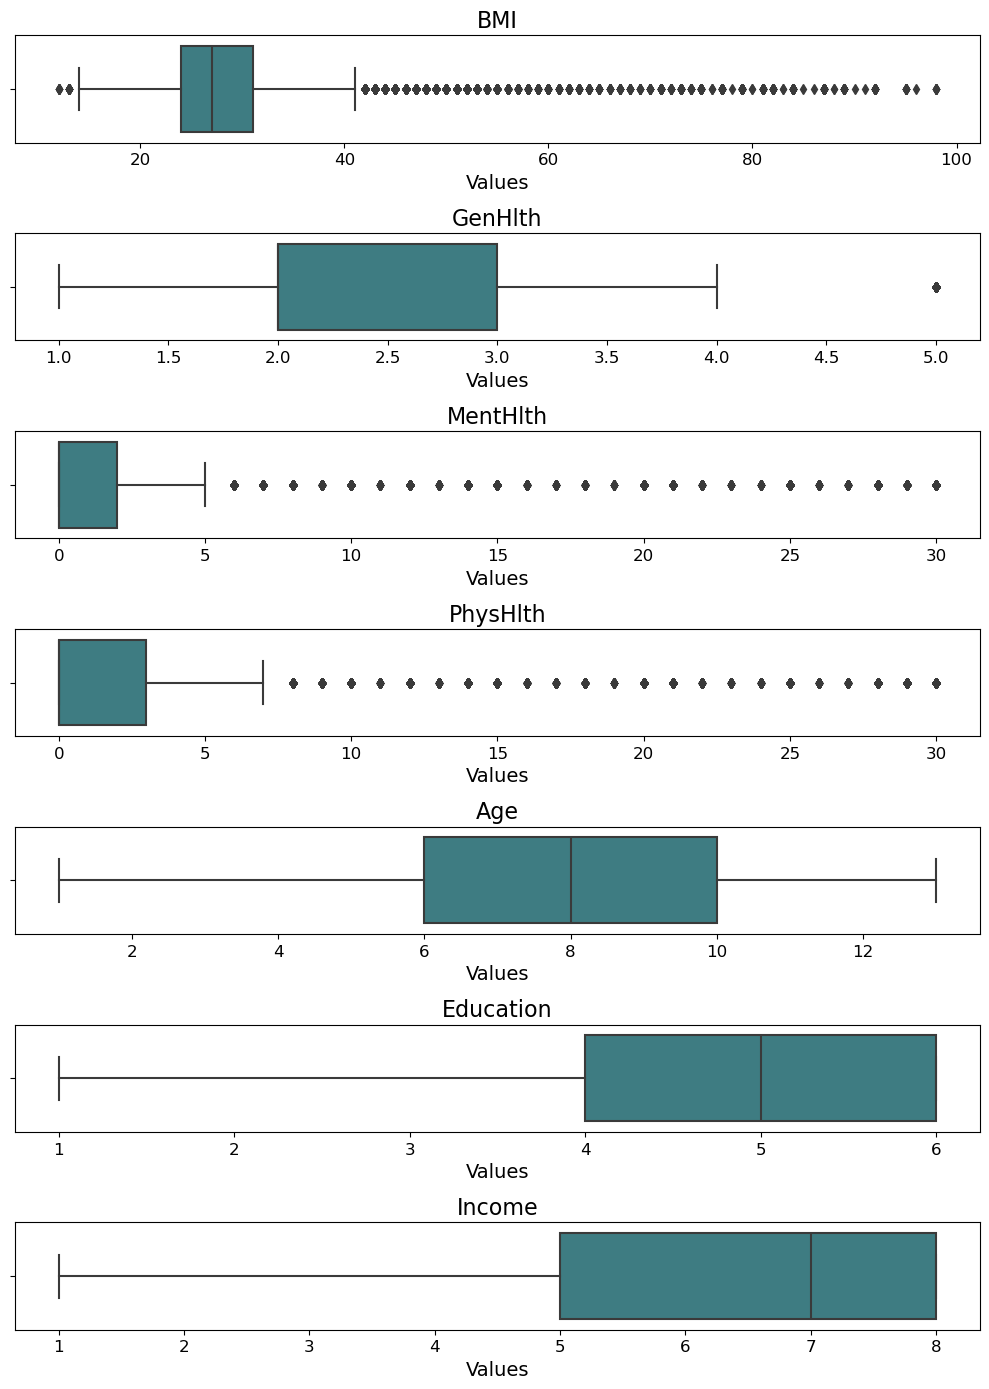

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'raw_data' is your DataFrame and is already loaded

# Filter columns: exclude those where all values are 0 or 1 (binary)
non_binary_columns = raw_data.columns[
    ~(raw_data.isin([0, 1]).all()) & (raw_data.columns != 'Diabetes_012')]

#non_binary_columns = raw_data.columns[~(raw_data.isin([0, 1]).all())]
non_binary_data = raw_data[non_binary_columns]

# Determine the number of non-binary columns to create an appropriate number of subplots
num_non_binary_columns = len(non_binary_columns)

# Create a figure and an array of subplots with 1 column and as many rows as there are non-binary columns
fig, axes = plt.subplots(num_non_binary_columns, 1, figsize=(10, num_non_binary_columns * 2))

# If there is only one non-binary column, axes will not be an array, so we wrap it in a list for consistency in handling
if num_non_binary_columns == 1:
    axes = [axes]

# Plot each non-binary column on its own subplot
for i, col in enumerate(non_binary_columns):
    sns.boxplot(x=non_binary_data[col], ax=axes[i], palette='crest')
    axes[i].set_title(col, fontsize=16)
    axes[i].set_xlabel('Values', fontsize=14)
    axes[i].tick_params(axis='x', labelsize=12)  # Adjust x-ticks label size if needed

# Adjust layout for better readability and to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()


## Bar chart for Target variable 

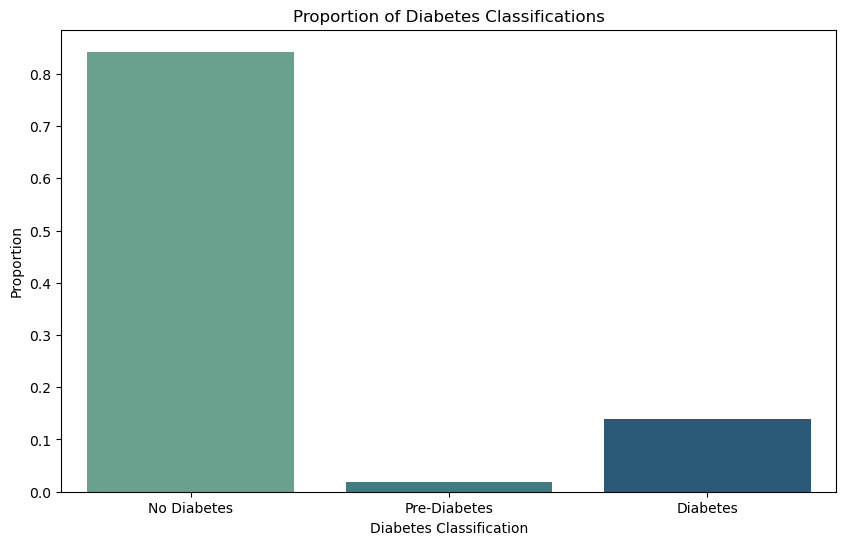

In [11]:
# Assuming 'raw_data' is your DataFrame
# Calculate the proportion of each unique value
value_counts = raw_data['Diabetes_012'].value_counts(normalize=True).reset_index()
#value_counts = raw_data['Diabetes_012'].value_counts().reset_index()
value_counts.columns = ['Diabetes_Classification', 'Proportion']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Diabetes_Classification', y='Proportion', data=value_counts, palette='crest')

# Adding chart details
plt.title('Proportion of Diabetes Classifications')
plt.xlabel('Diabetes Classification')
plt.ylabel('Proportion')
plt.xticks([0, 1, 2], ['No Diabetes', 'Pre-Diabetes', 'Diabetes']) # Adjust labels as necessary

plt.show()


## Statistics on Non Binary Features

In [12]:
# First, let's identify columns with non-binary values
non_binary_columns = [col for col in raw_data.columns if len(raw_data[col].unique()) > 2]

# Now, let's perform describe on those columns
describe_non_binary = raw_data[non_binary_columns].describe(include='all')

# Print the summary statistics
describe_non_binary

,Diabetes_012,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,28.382364,2.511392,3.184772,4.242081,8.032119,5.050434,6.053875
std,0.698160,6.608694,1.068477,7.412847,8.717951,3.054220,0.985774,2.071148
min,0.000000,12.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,24.000000,2.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,27.000000,2.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,31.000000,3.000000,2.000000,3.000000,10.000000,6.000000,8.000000
max,2.000000,98.000000,5.000000,30.000000,30.000000,13.000000,6.000000,8.000000


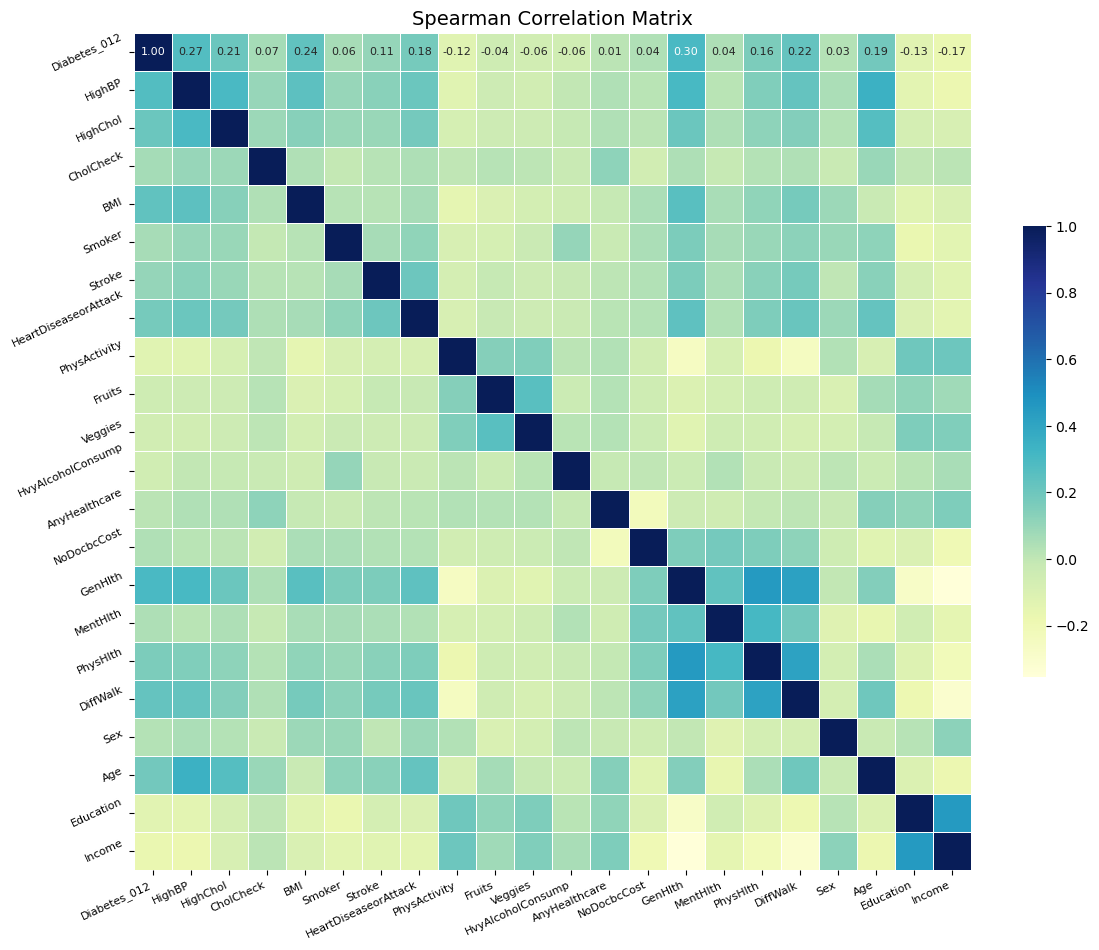

In [11]:
# Calculate the Spearman correlation matrix
corr_matrix = raw_data.corr(method='spearman')

# Visualize the correlation matrix using seaborn with the YlGnBu color palette
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='YlGnBu', 
            cbar=True, square=True, linewidths=.5, 
            cbar_kws={"shrink": .5}, annot_kws={"size": 8})

# Adjust font size for xticks and yticks to make them more legible but smaller than the title
plt.xticks(rotation=25, ha='right', fontsize=8)  # Smaller font size for xticks
plt.yticks(rotation=25, fontsize=8)  # Smaller font size for yticks

# Specify a larger font size for the title for emphasis
plt.title('Spearman Correlation Matrix', fontsize=14)  # Larger font size for the title
plt.tight_layout()
plt.show()

# Selection of Top Features

In [48]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import math

Features = ['HighBP', 'DiffWalk','GenHlth', 'HighChol', 'HeartDiseaseorAttack', 'Age', 'Income', 
            'PhysActivity', 'Education','Veggies', 'HvyAlcoholConsump', 'MentHlth','Fruits', 'Sex' ] # List of binary features


# Function to calculate Cramér's V
def cramers_v(chi2, n, r, k):
    phi2 = chi2 / n
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return math.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Loop through each feature and perform Chi-Squared test and calculate Cramér's V
for feature in Features:
    # Creating a contingency table for each feature and 'Diabetes_012'
    contingency_table = pd.crosstab(raw_data[feature], raw_data['Diabetes_012'])
    
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = np.sum(contingency_table.values)  # Total number of observations
    r, k = contingency_table.shape
    cramer_v = cramers_v(chi2, n, r, k)
    
    print(f"Feature: {feature}")
    print(f"Chi-Squared Test p-value: {p}")
    print(f"Cramér's V: {cramer_v}\n")


Feature: HighBP
Chi-Squared Test p-value: 0.0
Cramér's V: 0.27217716450982954

Feature: DiffWalk
Chi-Squared Test p-value: 0.0
Cramér's V: 0.2244074175639129

Feature: GenHlth
Chi-Squared Test p-value: 0.0
Cramér's V: 0.21858021962874977

Feature: HighChol
Chi-Squared Test p-value: 0.0
Cramér's V: 0.2106529468372893

Feature: HeartDiseaseorAttack
Chi-Squared Test p-value: 0.0
Cramér's V: 0.18025921269119705

Feature: Age
Chi-Squared Test p-value: 0.0
Cramér's V: 0.13768033284991893

Feature: Income
Chi-Squared Test p-value: 0.0
Cramér's V: 0.12401078437224328

Feature: PhysActivity
Chi-Squared Test p-value: 0.0
Cramér's V: 0.12218634641013408

Feature: Education
Chi-Squared Test p-value: 0.0
Cramér's V: 0.09470651397225167

Feature: Veggies
Chi-Squared Test p-value: 8.029645985781328e-195
Cramér's V: 0.059292761413907755

Feature: HvyAlcoholConsump
Chi-Squared Test p-value: 2.2619296719502035e-185
Cramér's V: 0.057828060755377074

Feature: MentHlth
Chi-Squared Test p-value: 0.0
Cramér'

## Top 10 Features

In [23]:
# Assuming 'raw_data' is your existing DataFrame
selected_columns = ['HighBP', 'HighChol', 'Stroke', 'GenHlth', 'Age', 'PhysActivity', 
                    'Income', 'BMI', 'HeartDiseaseorAttack', 'DiffWalk', 'Diabetes_012']

# Selecting the specified columns to create a new DataFrame
gbm_12_df = raw_data[selected_columns].copy()

# 'new_data' now contains only the selected columns from 'raw_data'
gbm_12_df.head(2)
print(gbm_12_df.shape)
gbm_12_df.head(2)

(253680, 11)


,HighBP,HighChol,Stroke,GenHlth,Age,PhysActivity,Income,BMI,HeartDiseaseorAttack,DiffWalk,Diabetes_012
0,1.0,1.0,0.0,5.0,9.0,0.0,3.0,40.0,0.0,1.0,0.0
1,0.0,0.0,0.0,3.0,7.0,1.0,1.0,25.0,0.0,0.0,0.0


In [24]:
#Step 1: Split data into features and target
X = gbm_12_df.drop('Diabetes_012', axis=1)
y = gbm_12_df['Diabetes_012']

In [23]:
#pip install lightgbm

## Use Random Search on Light GBM w/ Class Weights and Cross-Validation

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.utils.class_weight import compute_class_weight
import lightgbm as lgb
import matplotlib.pyplot as plt
from scipy import interp
from itertools import cycle
from sklearn.model_selection import RandomizedSearchCV

# Assuming gbm_12_df is defined and contains your data

# Split data into features and target
X = gbm_12_df.drop('Diabetes_012', axis=1)
y = gbm_12_df['Diabetes_012']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
# Convert class weights to a dictionary where keys are class labels and values are the computed class weights
class_weight_dict = {i: weight for i, weight in zip(np.unique(y_train), class_weights)}

# Map each y_train label to its corresponding weight
train_weights = [class_weight_dict[label] for label in y_train]

# Prepare LightGBM datasets with weights for imbalance handling
train_data = lgb.Dataset(X_train, label=y_train, weight=train_weights)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Define the parameter grid for random search
param_grid = {
    'boosting_type': ['gbdt'],
    'objective': ['multiclass'],
    'num_class': [len(np.unique(y_train))],
    'metric': [['multi_logloss', 'multi_error']],
    'num_leaves': [10, 15, 30],
    'learning_rate': [0.05, 0.1, 0.15],
    'feature_fraction': [0.9],
    'bagging_fraction': [0.8],
    'bagging_freq': [3, 5, 7],
    'min_child_samples': [5, 10, 20],
    'max_depth': [3, 5, 7],
    'min_child_weight': [0.001, 0.01, 0.1],
    'verbose': [0],
    'device': ['gpu'],  # Ensure your environment supports GPU
}

# Initialize LightGBM classifier
lgb_clf = lgb.LGBMClassifier()

# Perform Random Search
random_search = RandomizedSearchCV(estimator=lgb_clf, param_distributions=param_grid, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
random_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found by random search:")
print(random_search.best_params_)

# Get the best estimator
best_gbm = random_search.best_estimator_

# Predictions
y_pred_proba = best_gbm.predict_proba(X_test)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

## Plot the ROC and Confusion Matrix 

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
Accuracy: 0.8486
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


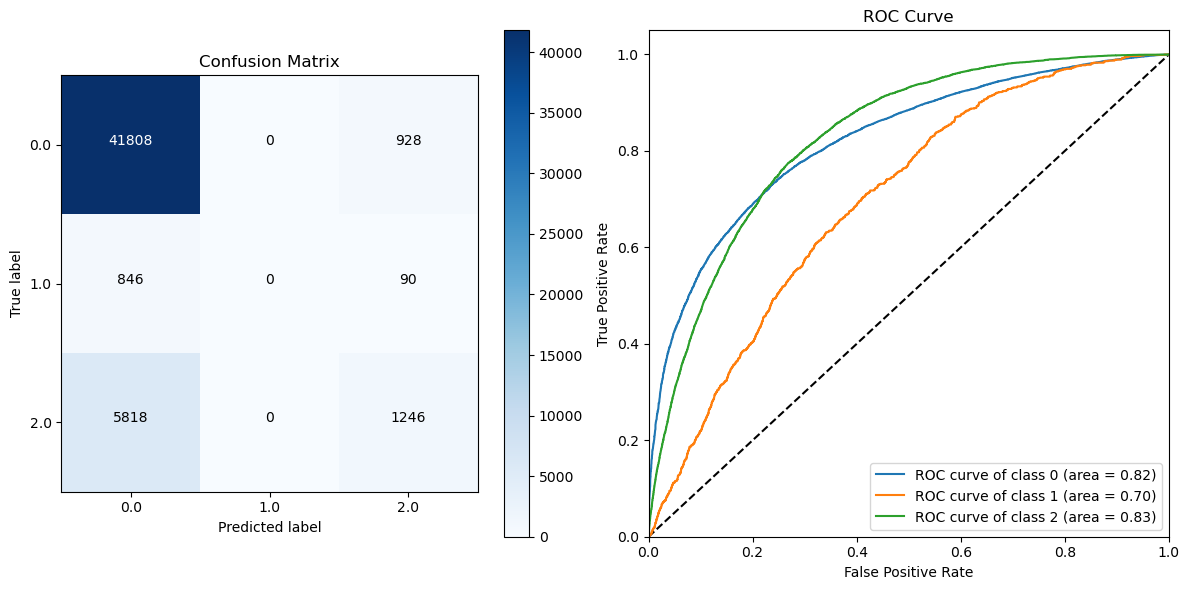

In [39]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score

def evaluate_model(best_model, X_test, y_test):
    # Evaluate the model using the best parameters
    y_pred = best_model.predict(X_test)

    # Calculate accuracy
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    print("Accuracy:", accuracy)

    # Create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    classes = np.unique(y_test)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    # Calculate ROC curve and ROC area for each class
    y_pred_proba = best_model.predict_proba(X_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.subplot(1, 2, 2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

    for i in range(len(classes)):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.legend(loc="lower right")

    plt.tight_layout()

    # Display the plot
    plt.show()

# Example usage:
evaluate_model(best_gbm, X_test, y_test)

## LightGBM Top 12 Features with SMOTE-NC

In [40]:
# Selecting the specified columns to create a new DataFrame
gbm_12_smt = gbm_12_df.copy()

# 'new_data' now contains only the selected columns from 'raw_data'
print(gbm_12_smt.shape)
gbm_12_smt.head(2)

(253680, 11)


,HighBP,HighChol,Stroke,GenHlth,Age,PhysActivity,Income,BMI,HeartDiseaseorAttack,DiffWalk,Diabetes_012
0,1.0,1.0,0.0,5.0,9.0,0.0,3.0,40.0,0.0,1.0,0.0
1,0.0,0.0,0.0,3.0,7.0,1.0,1.0,25.0,0.0,0.0,0.0


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming 'gbm_12_smt' is your pandas DataFrame

# Step 1: Split the DataFrame into features (X) and target variable (y)
X = gbm_12_smt.drop(columns=['Diabetes_012'])
y = gbm_12_smt['Diabetes_012']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Print unique value distribution for the target variable in the training set
print("Unique value distribution in the training set:")
print(y_train_smote.value_counts())

# Now you can use X_train_smote and y_train_smote for training your model

Unique value distribution in the training set:
Diabetes_012
0.0    170908
2.0    170908
1.0    170908
Name: count, dtype: int64


In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.utils.class_weight import compute_class_weight
import lightgbm as lgb
import matplotlib.pyplot as plt
from scipy import interp
from itertools import cycle
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for random search
param_grid = {
    'boosting_type': ['gbdt'],
    'objective': ['multiclass'],
    'num_class': [len(np.unique(y_train))],
    'metric': [['multi_logloss', 'multi_error']],
    'num_leaves': [15, 20],
    'learning_rate': [0.1, 0.15],
    'feature_fraction': [0.9],
    'bagging_fraction': [0.8],
    'bagging_freq': [3, 5],
    'min_child_samples': [5, 10],
    'max_depth': [5, 7],
    'min_child_weight': [0.001, 0.01],
    'verbose': [0],
    'device': ['gpu'],  # Ensure your environment supports GPU
}

# Initialize LightGBM classifier
lgb_clf = lgb.LGBMClassifier()

# Perform Random Search
random_search = RandomizedSearchCV(estimator=lgb_clf, param_distributions=param_grid, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
random_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found by random search:")
print(random_search.best_params_)

# Get the best estimator
best_gbm_sm = random_search.best_estimator_

# Predictions
y_pred_proba = best_gbm.predict_proba(X_test)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
Accuracy: 0.8503
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


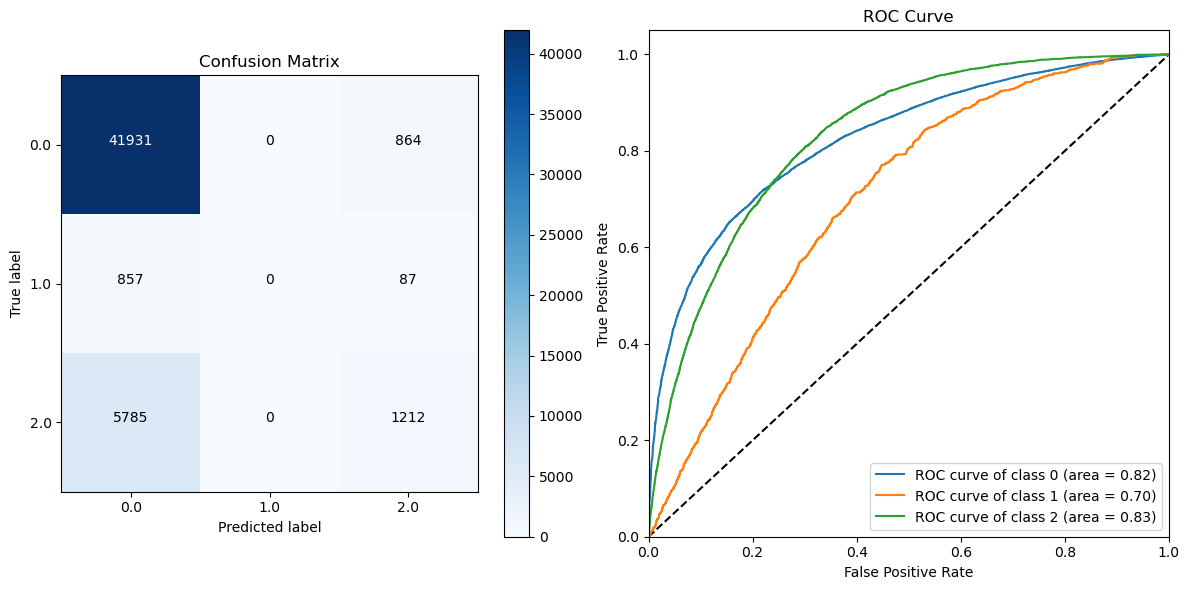

In [43]:
evaluate_model(best_gbm_sm, X_test, y_test)